# How to plausibly deny steganographic secrets 

# Disclaimer:

In [1]:
#All the datasets are downloaded from Kaggle (https://www.kaggle.com/datasets/melikbekyanashot/faces-dataset) 
#and Linnaeus 5 dataset (http://chaladze.com/l5/)

In [2]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import cv2
from PIL import Image
from numpy import asarray
from skimage.io import imsave
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import PIL
import scipy.misc
from skimage import exposure, img_as_ubyte
import imageio
from keras.preprocessing.image import load_img
import warnings
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import pandas as pd
import os
import random
import glob
from os import listdir
from os.path import isfile, join
from numpy import savez_compressed
from skimage.util import img_as_int
import xlrd
from numpy import save
from numpy import load

# System Initialization
Reading pictures from the album and preprocessing them by "freeing up" the space to place steganographic secrets (or random data )

# Embedding of Secrets

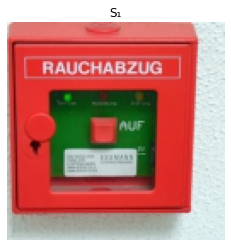

In [3]:
secret1 = 'C:/Users/...path....' 
glob.glob(secret1)
# Using List Comprehension to read all images
secrets = [imageio.imread(image).astype(np.uint8) for image in glob.glob(secret1)]
S1=random.choice(secrets) #reading secret image(randomly)
plt.imshow(S1)
plt.axis('off')
plt.title('S\u2081')
plt.show()

In [4]:
#first we create an album of pictures that contains no LSBs. We have used the below code to create such an album
#Uncomment to run the code


#img = Image.open("C:/Users/.....path....")
#pixels = list(img.getdata())
#new_pixels = [(r & 254, g & 254, b & 254) for (r, g, b) in pixels]
#new_img = Image.new(img.mode, img.size)
#new_img.putdata(new_pixels)
#new_img.save("C:/Users.....path....")

In [5]:
file = 'C:/Users/...path..../*.png' 
glob.glob(file)
images1 = [imageio.imread(image).astype(np.uint8) for image in glob.glob(file)]
random.shuffle(images1)

Enter the number of images (Iᶜ) to be used for creating Residual share (R₁): 5


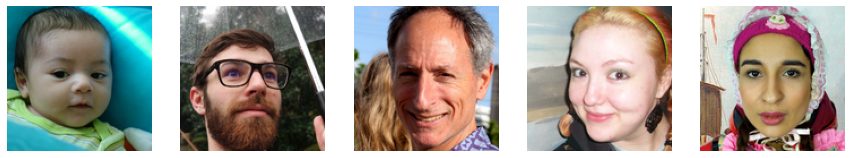

In [6]:
fig=plt.figure(figsize=(15, 15))
rows, cols = 1, int(input("Enter the number of images (I\u1D9C) to be used for creating Residual share (R\u2081): "))
for j in range(0, cols*rows):
  fig.add_subplot(rows, cols, j+1)
  plt.imshow(images1[j])
  plt.axis('off')
plt.show()

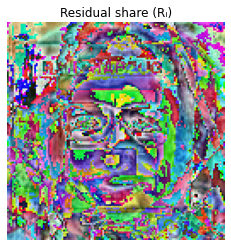

In [7]:
I_c1=sum(images1[0:cols])
R1=(S1-I_c1)
plt.imshow(R1.astype('uint8'))       
plt.axis('off')
plt.title('Residual share (R\u1D62)')
plt.show()

In [8]:
cv2.imwrite('C:/Users/...path..../residual1.png',R1)

True

Splitting the Channels of Residual share: 
We are splitting the channels of residual shares so that they can easily be embedded inside any of the images of album (I_c)

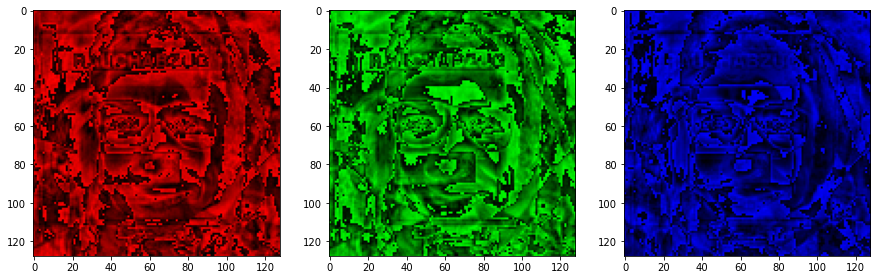

In [9]:
pic = imageio.imread('C:/Users/...path..../residual1.png')
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))



for c, ax in zip(range(3), ax):
    
    # create zero matrix
    split_img = np.zeros(pic.shape, dtype="uint8") # 'dtype' by default: 'numpy.float64'
    
    # assing each channel 
    split_img[ :, :, c] = pic[ :, :, c]
    
    # display each channel
    ax.imshow(split_img)
#The splitted channels shown below are grey images but for demonstration we are using Red, Green and Blue (RGB)

In [10]:
#saving the respective channel shares
#Red Channel
Red1=np.array(pic[ : , : , 2])
im = Image.fromarray(Red1)
im.save("C:/Users/...path..../Red1.png")

#Green Channel
Green1=np.array(pic[ : , : , 1])
im = Image.fromarray(Green1)
im.save("C:/Users/...path..../Green1.png")

#Blue Channel
Blue1=np.array(pic[ : , : , 0])
im = Image.fromarray(Blue1)
im.save("C:/Users/...path..../Blue1.png")

### Use of Open Stego

In [ ]:
import os                #for checking the current directory
os.getcwd()

#for changing the directory
%cd C:/Users/...path....      
    
!pwd |java -Xmx1024m -jar openstego.jar embed -mf Red1.png -cf 00000.png -sf 00000.png  
!pwd |java -Xmx1024m -jar openstego.jar embed -mf Green1.png -cf 00006.png -sf 00006.png  
!pwd |java -Xmx1024m -jar openstego.jar embed -mf Blue1.png -cf 00980.png -sf 00980.png  
#here mf stands for message file, cf for cover file and sf for stego file

### Embedding of further secrets

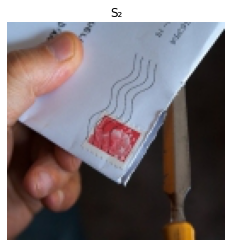

In [12]:
secret2 = 'C:/Users/...path....' 
glob.glob(secret2)
# Using List Comprehension to read all images
secrets = [imageio.imread(image).astype(np.uint8) for image in glob.glob(secret2)]
S2=random.choice(secrets) #reading secret image(randomly)
plt.imshow(S2)
plt.axis('off')
plt.title('S\u2082')
plt.show()

Enter the number of images (Iᶜ) to be used for creating Residual share (R₂): 7


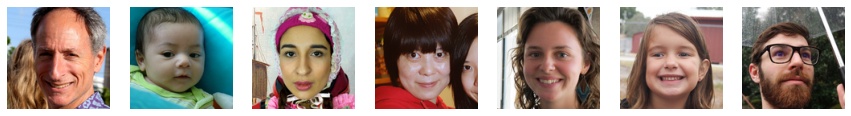

In [13]:
#Reading the images from the album (I_c)
file = 'C:/Users/...path..../*.png' 
glob.glob(file)
images2 = [imageio.imread(image).astype(np.uint8) for image in glob.glob(file)]
random.shuffle(images2)
fig=plt.figure(figsize=(15, 15))
rows, cols = 1, int(input("Enter the number of images (I\u1D9C) to be used for creating Residual share (R\u2082): "))
for j in range(0, cols*rows):
  fig.add_subplot(rows, cols, j+1)
  plt.imshow(images2[j])
  plt.axis('off')
plt.show()

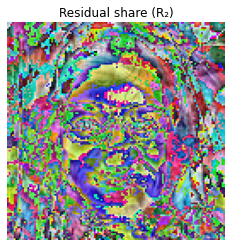

In [16]:
#Residual share creation (R_i)
I_c2=sum(images2[0:cols])
R2=(S2-I_c2)
plt.imshow(R2.astype('uint8'))       
plt.axis('off')
plt.title('Residual share (R\u2082)')
plt.show()

In [17]:
#Saving Residual share (R_i) as an Image
cv2.imwrite('C:/Users/...path..../residual2.png',R2)

True

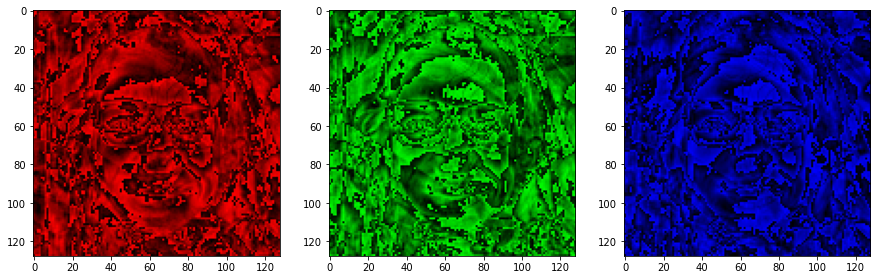

In [18]:
#Splitting the Channels of Residual share
pic = imageio.imread('C:/Users/...path..../residual2.png')
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))



for c, ax in zip(range(3), ax):
    
    # create zero matrix
    split_img = np.zeros(pic.shape, dtype="uint8") # 'dtype' by default: 'numpy.float64'
    
    # assing each channel 
    split_img[ :, :, c] = pic[ :, :, c]
    
    # display each channel
    ax.imshow(split_img)
#The splitted channels shown below are grey images but for demonstration we are using Red, Green and Blue (RGB)

In [19]:
#saving the respective channel shares
#Red Channel
Red2=np.array(pic[ : , : , 2])
im = Image.fromarray(Red2)
im.save("C:/Users/...path..../Red2.png")

#Green Channel
Green2=np.array(pic[ : , : , 1])
im = Image.fromarray(Green2)
im.save("C:/Users/...path..../Green2.png")

#Blue Channel
Blue2=np.array(pic[ : , : , 0])
im = Image.fromarray(Blue2)
im.save("C:/Users/...path..../Blue2.png")

In [ ]:
#Use of Open Stego
#To embed the residual shares, we have used open stego and embedded the residual share (red, green and blue) inside the album
import os                #for checking the current directory
os.getcwd()

#for changing the directory
%cd C:/Users/...path....      
    
!pwd |java -Xmx1024m -jar openstego.jar embed -mf Red2.png -cf 00001.png -sf 00001.png   
!pwd |java -Xmx1024m -jar openstego.jar embed -mf Green2.png -cf 00004.png -sf 00004.png  
!pwd |java -Xmx1024m -jar openstego.jar embed -mf Blue2.png -cf 01038.png -sf 01038.png 
#here mf stands for message file, cf for cover file and sf for stego file

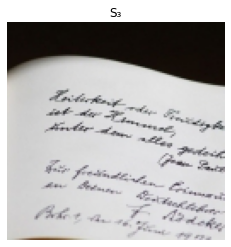

In [21]:
secret3 = 'C:/Users/...path....' 
glob.glob(secret3)
# Using List Comprehension to read all images
secrets = [imageio.imread(image).astype(np.uint8) for image in glob.glob(secret3)]
S3=random.choice(secrets) #reading secret image(randomly)
plt.imshow(S3)
plt.axis('off')
plt.title('S\u2083')
plt.show()

Enter the number of images (Iᶜ) to be used for creating Residual share (R₃): 9


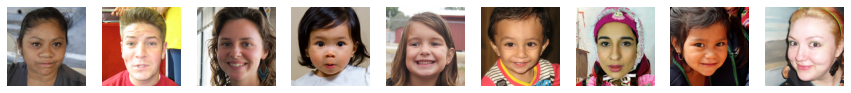

In [22]:
#Reading the images from the album (I_c)
file = 'C:/Users/...path..../*.png' 
glob.glob(file)
images3 = [imageio.imread(image).astype(np.uint8) for image in glob.glob(file)]
random.shuffle(images3)
fig=plt.figure(figsize=(15, 15))
rows, cols = 1, int(input("Enter the number of images (I\u1D9C) to be used for creating Residual share (R\u2083): "))
for j in range(0, cols*rows):
  fig.add_subplot(rows, cols, j+1)
  plt.imshow(images3[j])
  plt.axis('off')
plt.show()

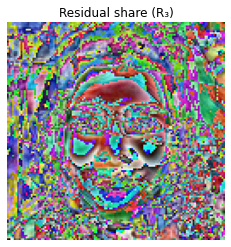

In [25]:
#Residual share creation (R_i)
I_c3=sum(images3[0:cols])
R3=(S3-I_c3)
plt.imshow(R3.astype('uint8'))       
plt.axis('off')
plt.title('Residual share (R\u2083)')
plt.show()

In [26]:
#Saving Residual share (R_i) as an Image
cv2.imwrite('C:/Users/...path..../residual3.png',R3 )

True

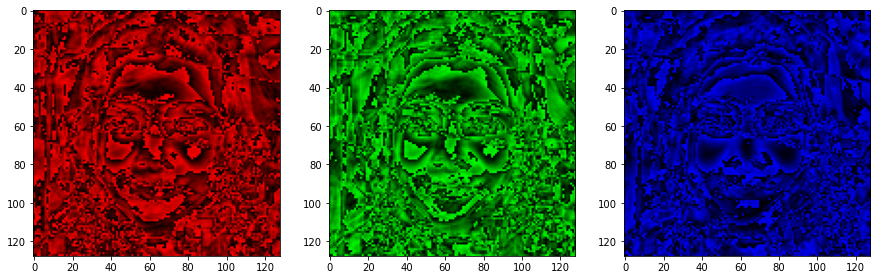

In [27]:
#Splitting the Channels of Residual share
pic = imageio.imread('C:/Users/...path..../residual3.png')
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))



for c, ax in zip(range(3), ax):
    
    # create zero matrix
    split_img = np.zeros(pic.shape, dtype="uint8") # 'dtype' by default: 'numpy.float64'
    
    # assing each channel 
    split_img[ :, :, c] = pic[ :, :, c]
    
    # display each channel
    ax.imshow(split_img)
#The splitted channels shown below are grey images but for demonstration we are using Red, Green and Blue (RGB)

In [28]:
#saving the respective channel shares
#Red Channel
Red3=np.array(pic[ : , : , 2])
im = Image.fromarray(Red3)
im.save("C:/Users/...path..../Red3.png")

#Green Channel
Green3=np.array(pic[ : , : , 1])
im = Image.fromarray(Green3)
im.save("C:/Users/...path..../Green3.png")

#Blue Channel
Blue3=np.array(pic[ : , : , 0])
im = Image.fromarray(Blue3)
im.save("C:/Users/...path..../Blue3.png")

In [ ]:
#Use of Open Stego
#To embed the residual shares, we have used open stego and embedded the residual share (red, green and blue) inside the album
import os                #for checking the current directory
os.getcwd()

#for changing the directory
%cd C:/Users/...path....      
    
!pwd |java -Xmx1024m -jar openstego.jar embed -mf Red3.png -cf 00008.png -sf 00008.png   
!pwd |java -Xmx1024m -jar openstego.jar embed -mf Green3.png -cf 00002.png -sf 00002.png  
!pwd |java -Xmx1024m -jar openstego.jar embed -mf Blue3.png -cf 00009.png -sf 00009.png 
#here mf stands for message file, cf for cover file and sf for stego file

In [30]:
#Likewise, we can embed as many numbers of secrets as we like inside the album (I_c)

# Extracting the i-th message

In [31]:
r1 = imageio.imread('C:/Users/...path..../Red1.png')
g1 = imageio.imread('C:/Users/...path..../Green1.png')
b1 = imageio.imread('C:/Users/...path..../Blue1.png')

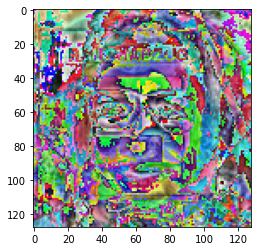

In [32]:
#Stacking all residual shares
output1=np.dstack((r1,g1,b1))
plt.imshow(output1)
plt.show()

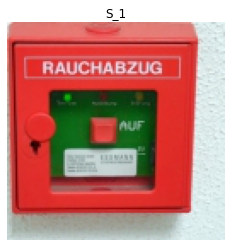

In [33]:
#Creating the Secret Image (S1) from Residual shares (R1) and album (I_c)
S11=(I_c1+output1)
S_dash1=S11.astype('uint8')
plt.imshow(S_dash1)
plt.axis('off')
plt.title('S_1')
plt.show()

In [35]:
r2 = imageio.imread('C:/Users/...path..../Red2.png')
g2 = imageio.imread('C:/Users/...path..../Green2.png')
b2 = imageio.imread('C:/Users/...path..../Blue2.png')

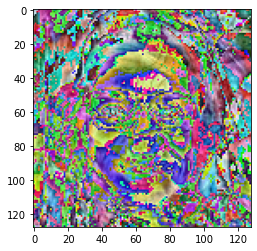

In [36]:
#Stacking all residual shares
output2=np.dstack((r2,g2,b2))
plt.imshow(output2)
plt.show()

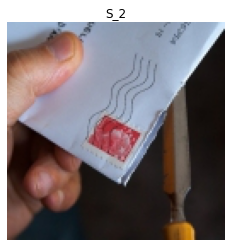

In [37]:
#Creating the Secret Image (S_i) from Residual shares (R_i) and Image(s)
S22=(I_c2+output2)
S_dash2=S22.astype('uint8')
plt.imshow(S_dash2)
plt.axis('off')
plt.title('S_2')
plt.show()

In [38]:
#S_dash2==S2      #checking whether the created secret image and the original secret are same or not

In [39]:
r3 = imageio.imread('C:/Users/...path..../Red3.png')
g3 = imageio.imread('C:/Users/...path..../Green3.png')
b3 = imageio.imread('C:/Users/...path..../Blue3.png')

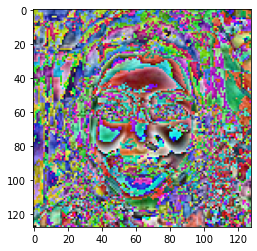

In [40]:
#Stacking all residual shares
output3=np.dstack((r3,g3,b3))
plt.imshow(output3)
plt.show()

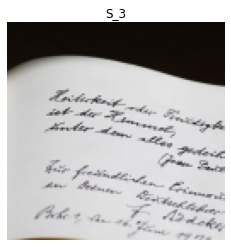

In [41]:
#Creating the Secret Image (S_i) from Residual shares (R_i) and Image(s)
S33=(I_c3+output3)
S_dash3=S33.astype('uint8')
plt.imshow(S_dash3)
plt.axis('off')
plt.title('S_3')
plt.show()

# Deleting a secret m_i 

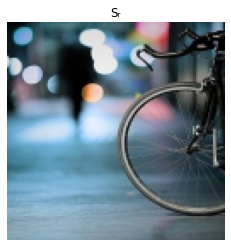

In [43]:
random_secret = 'C:/Users/...path....' 
glob.glob(random_secret)
# Using List Comprehension to read all images
secrets = [imageio.imread(image).astype(np.uint8) for image in glob.glob(random_secret)]
Sr=random.choice(secrets) #reading secret image(randomly)
plt.imshow(Sr)
plt.axis('off')
plt.title('S\u1D63')
plt.show()

Enter the number of images (Iᶜ) to be used for creating Residual share (Rᵣ): 8


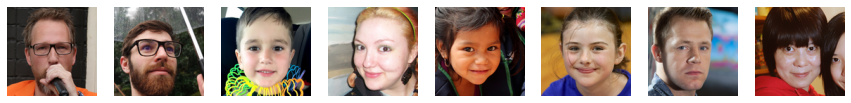

In [44]:
#Reading the images from the album (I_c)
file = 'C:/Users/AK124885/Downloads/cover/*.png' 
glob.glob(file)
random_images = [imageio.imread(image).astype(np.uint8) for image in glob.glob(file)]
random.shuffle(random_images)
fig=plt.figure(figsize=(15, 15))
rows, cols = 1, int(input("Enter the number of images (I\u1D9C) to be used for creating Residual share (R\u1D63): "))
for j in range(0, cols*rows):
  fig.add_subplot(rows, cols, j+1)
  plt.imshow(random_images[j])
  plt.axis('off')
plt.show()

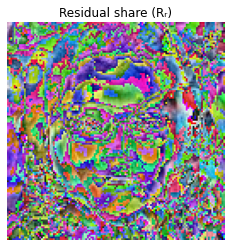

In [46]:
#Residual share creation (R_r)
I_cr=sum(random_images[0:cols])
Rr=(Sr-I_cr)
plt.imshow(Rr.astype('uint8'))       
plt.axis('off')
plt.title('Residual share (R\u1D63)')
plt.show()

In [47]:
#Saving random residual share (R_i) as an Image
cv2.imwrite('C:/Users/...path..../random_residual.png',Rr)

True

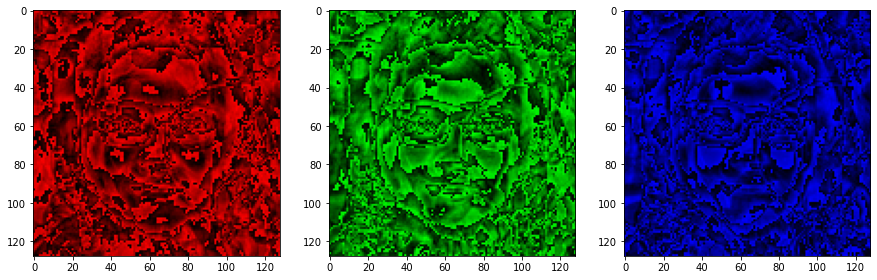

In [48]:
#Splitting the Channels of random residual share
pic = imageio.imread('C:/Users/...path..../random_residual.png')
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))



for c, ax in zip(range(3), ax):
    
    # create zero matrix
    split_img = np.zeros(pic.shape, dtype="uint8") # 'dtype' by default: 'numpy.float64'
    
    # assing each channel 
    split_img[ :, :, c] = pic[ :, :, c]
    
    # display each channel
    ax.imshow(split_img)
#The splitted channels shown below are grey images but for demonstration we are using Red, Green and Blue (RGB)

In [49]:
#saving the respective channel shares
#Red Channel
Redr=np.array(pic[ : , : , 2])
im = Image.fromarray(Redr)
im.save("C:/Users/...path..../Redr.png")

#Green Channel
Greenr=np.array(pic[ : , : , 1])
im = Image.fromarray(Greenr)
im.save("C:/Users/...path..../Greenr.png")

#Blue Channel
Bluer=np.array(pic[ : , : , 0])
im = Image.fromarray(Bluer)
im.save("C:/Users/...path..../Bluer.png")

In [ ]:
#Use of Open Stego
#To embed the residual shares, we have used open stego and embedded the residual share (red, green and blue) inside the album
import os                #for checking the current directory
os.getcwd()

#for changing the directory
%cd C:/Users/...path....     
    
!pwd |java -Xmx1024m -jar openstego.jar embed -mf Redr.png -cf 00000_r.png -sf 00000.png  
!pwd |java -Xmx1024m -jar openstego.jar embed -mf Greenr.png -cf 00006_g.png -sf 00006.png  
!pwd |java -Xmx1024m -jar openstego.jar embed -mf Bluer.png -cf 00980_b.png -sf 00980.png
#here mf stands for message file, cf for cover file and sf for stego file

In [51]:
rr = imageio.imread('C:/Users/...path..../Redr.png')
gr = imageio.imread('C:/Users/...path..../Greenr.png')
br = imageio.imread('C:/Users/...path..../Bluer.png')

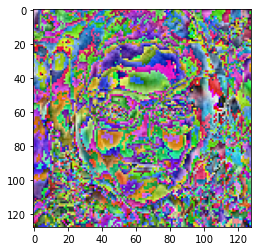

In [52]:
#Stacking all residual shares of random image
outputr=np.dstack((rr,gr,br))
plt.imshow(outputr)
plt.show()

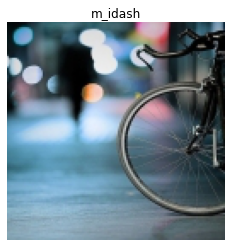

In [53]:
#Creating the Secret Image (m_idash) from Residual shares (R_i) and Album Image(I_c)
Srr=(I_cr+outputr)
m_idash=Srr.astype('uint8')
plt.imshow(m_idash)
plt.axis('off')
plt.title('m_idash')
plt.show()

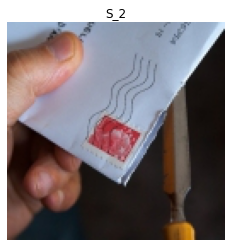

In [54]:
r2 = imageio.imread('C:/Users/...path..../Red2.png')
g2 = imageio.imread('C:/...path..../Green2.png')
b2 = imageio.imread('C:/...path..../Blue2.png')
#Stacking all residual shares
output2=np.dstack((r2,g2,b2))
plt.imshow(output2)
#plt.show()
#Creating the Secret Image (S_i) from Residual shares (R_i) and Album Image(I_c)
S22=(I_c2+output2)
S_dash2=S22.astype('uint8')
plt.imshow(S_dash2)
plt.axis('off')
plt.title('S_2')
plt.show()

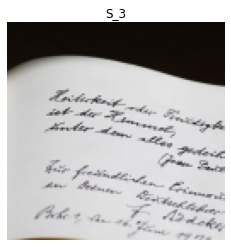

In [55]:
r3 = imageio.imread('C:/Users/...path..../Red3.png')
g3 = imageio.imread('C:/Users/...path..../Green3.png')
b3 = imageio.imread('C:/Users/...path..../Blue3.png')
#Stacking all residual shares
output3=np.dstack((r3,g3,b3))
plt.imshow(output3)
#plt.show()
#Creating the Secret Image (S_i) from Residual shares (R_i) and Image(s)
S33=(I_c3+output3)
S_dash3=S33.astype('uint8')
plt.imshow(S_dash3)
plt.axis('off')
plt.title('S_3')
plt.show()

# Updating a secret

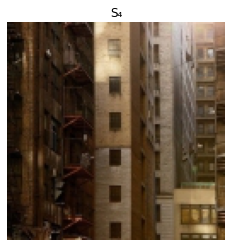

Enter the number of images (Iᶜ) to be used for creating Residual share (R₄): 6


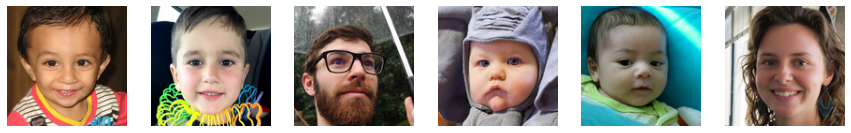

In [57]:
secret4 = 'C:/Users/...path....' 
glob.glob(secret4)
# Using List Comprehension to read all images
secrets = [imageio.imread(image).astype(np.uint8) for image in glob.glob(secret4)]
S4=random.choice(secrets) #reading secret image(randomly)
plt.imshow(S4)
plt.axis('off')
plt.title('S\u2084')
plt.show()
#Reading the images from the album (I_c)
file = 'C:/Users/...path..../*.png' 
glob.glob(file)
images4 = [imageio.imread(image).astype(np.uint8) for image in glob.glob(file)]
random.shuffle(images4)
fig=plt.figure(figsize=(15, 15))
rows, cols = 1, int(input("Enter the number of images (I\u1D9C) to be used for creating Residual share (R\u2084): "))
for j in range(0, cols*rows):
  fig.add_subplot(rows, cols, j+1)
  plt.imshow(images4[j])
  plt.axis('off')
plt.show()


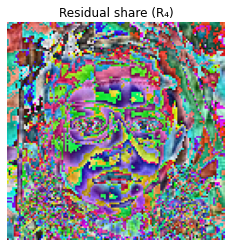

True

In [58]:
#Residual share creation (R_r)
I_c4=sum(images4[0:cols])
R4=(S4-I_c4)
plt.imshow(R4.astype('uint8'))       
plt.axis('off')
plt.title('Residual share (R\u2084)')
plt.show()
#Saving residual share (R_i) as an Image
cv2.imwrite('C:/Users/...path..../residual4.png',R4)


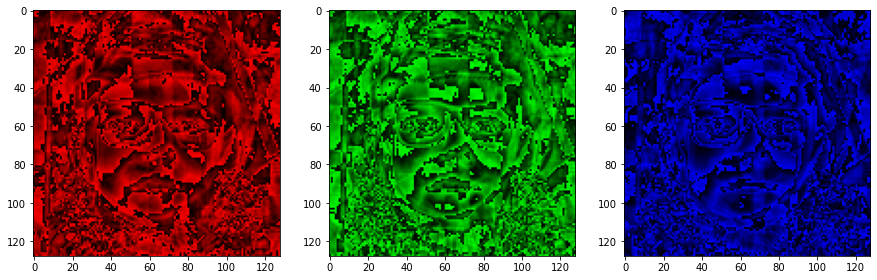

In [59]:
#Splitting the Channels of random residual share
pic = imageio.imread('C:/Users/...path..../residual4.png')
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))



for c, ax in zip(range(3), ax):
    
    # create zero matrix
    split_img = np.zeros(pic.shape, dtype="uint8") # 'dtype' by default: 'numpy.float64'
    
    # assing each channel 
    split_img[ :, :, c] = pic[ :, :, c]
    
    # display each channel
    ax.imshow(split_img)
#The splitted channels shown below are grey images but for demonstration we are using Red, Green and Blue (RGB)
#saving the respective channel shares
#Red Channel
Red4=np.array(pic[ : , : , 2])
im = Image.fromarray(Red4)
im.save("C:/Users/...path..../Red4.png")

#Green Channel
Green4=np.array(pic[ : , : , 1])
im = Image.fromarray(Green4)
im.save("C:/Users/...path..../Green4.png")

#Blue Channel
Blue4=np.array(pic[ : , : , 0])
im = Image.fromarray(Blue4)
im.save("C:/Users/...path..../Blue4.png")

In [ ]:
#Use of Open Stego
#To embed the residual shares, we have used open stego and embedded the residual share (red, green and blue) inside the album
import os                #for checking the current directory
os.getcwd()

#for changing the directory
%cd C:/Users/...path....    
    
!pwd |java -Xmx1024m -jar openstego.jar embed -mf Red4.png -cf 00001.png -sf 00001.png   
!pwd |java -Xmx1024m -jar openstego.jar embed -mf Green4.png -cf 00004.png -sf 00004.png  
!pwd |java -Xmx1024m -jar openstego.jar embed -mf Blue4.png -cf 01038.png -sf 01038.png 
#here mf stands for message file, cf for cover file and sf for stego file

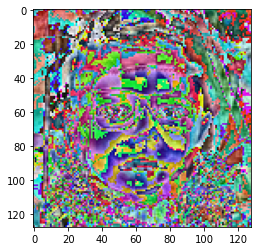

In [61]:
r4 = imageio.imread('C:/Users/...path..../Red4.png')
g4 = imageio.imread('C:/Users/...path..../Green4.png')
b4 = imageio.imread('C:/Users/...path..../Blue4.png')
#Stacking all residual shares
output4=np.dstack((r4,g4,b4))
plt.imshow(output4)
plt.show()


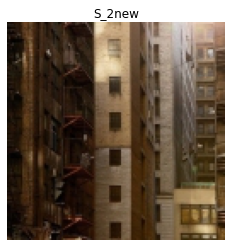

In [63]:
#Creating the Secret Image (S_i) from Residual shares (R_i) and Album Image(I_c)
S22=(I_c4+output4)
S_2new=S22.astype('uint8')
plt.imshow(S_2new)
plt.axis('off')
plt.title('S_2new')
plt.show()